In [1]:
%load_ext autoreload
%autoreload 2

import yaml

import numpy as np
import pandas as pd
import scipy 

import MicroTools as mt

from MicroTools import unfolder
from MicroTools.TemplateTools import mcmc_signal
from MicroTools.TemplateTools import miniboone_fit as mbfit
from MicroTools.InclusiveTools import inclusive
import MicroTools.InclusiveTools.inclusive as cern

from MicroTools.TemplateTools import template_analysis as templ

from MicroTools.plot_tools import *

/usr/local/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Loading covariance matrices and getting 2D numpy arrays

11 channel covariance matrix showing uncertainties and correlations between bins due to flux uncertainties, cross-section uncertainties, hadron reinteraction uncertainties, detector systematic uncertainties, Monte-Carlo statistical uncertainties, and dirt (outside cryostat) uncertainties. 

For the data statistical uncertainty covariance matrix, (only diagonal elements, not included here), the Neyman, Pearson, or combined Neyman and Pearson (CNP) techniques can be used. This corresponds to LEE(x=0.0), the standard prediction with no low energy excess. No constraints have been applied at this stage. 

* The 1-26th bins/rows/columns correspond to the CC  FC channel. 

* The 27-52nd bins/rows/columns correspond to the CC  PC channel. 

* The 53-78th bins/rows/columns correspond to the CC  FC channel. 

* The 79-104th bins/rows/columns correspond to the CC  PC channel. 

* The 105-130th bins/rows/columns correspond to the CC  FC channel. 

* The 131-156th bins/rows/columns correspond to the CC  PC channel. 

* The 157-182nd bins/rows/columns correspond to the CC  FC channel. 

* The 183-208th bins/rows/columns correspond to the CC  PC channel. 

* The 209-219th bins/rows/columns correspond to the CC FC channel. 

* The 220-230th bins/rows/columns correspond to the CC PC channel. 

* The 231-241st bins/rows/columns correspond to the NC.

# Loading data and getting 1D numpy arrays

In [2]:
yamlDir = "MicroTools/muB_data/inclusive_data/DataRelease_v3/" 
yaml_dict = {}

def get_from_yaml(yaml_dict, name):
    with open(yamlDir+f"/{name}.yaml", "r") as stream:
        try:
            yaml_dict[name] = yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            print(exc)
def get_data_and_pred_arrays_from_dict(yaml_dict, name):
    data = []
    pred = []
    for i in range(len(yaml_dict[name]['dependent_variables'][0]['values'])):
        data.append(yaml_dict[name]['dependent_variables'][0]['values'][i]["value"])
        pred.append(yaml_dict[name]['dependent_variables'][-1]['values'][i]["value"])
    return np.array(data), np.array(pred)

get_from_yaml(yaml_dict, name='cov_lee_x_00')
get_from_yaml(yaml_dict, name='eleven_ch_cov_lee_x_00')


cov_dic = {}
cov=[]
for i in range(len(yaml_dict["cov_lee_x_00"]['dependent_variables'][0]['values'])):
    if i % 137 == 0:
        cov.append([])
    cov[-1].append(yaml_dict["cov_lee_x_00"]['dependent_variables'][0]['values'][i]["value"])
cov_dic['seven_channel'] = np.array(cov)

cov_11=[]
for i in range(len(yaml_dict["eleven_ch_cov_lee_x_00"]['dependent_variables'][0]['values'])):
    if i % 241 == 0:
        cov_11.append([])
    cov_11[-1].append(yaml_dict["eleven_ch_cov_lee_x_00"]['dependent_variables'][0]['values'][i]["value"])
cov_11 = np.array(cov_11)
cov_dic['eleven_channel'] = np.array(cov_11)


get_from_yaml(yaml_dict, name='nueCC_0pXpi_FC')
get_from_yaml(yaml_dict, name='nueCC_0pXpi_PC')
get_from_yaml(yaml_dict, name='nueCC_NpXpi_FC')
get_from_yaml(yaml_dict, name='nueCC_NpXpi_PC')
get_from_yaml(yaml_dict, name='numuCC_0pXpi_FC')
get_from_yaml(yaml_dict, name='numuCC_0pXpi_PC')
get_from_yaml(yaml_dict, name='numuCC_NpXpi_FC')
get_from_yaml(yaml_dict, name='numuCC_NpXpi_PC')
get_from_yaml(yaml_dict, name='numuCCpi0_FC')
get_from_yaml(yaml_dict, name='numuCCpi0_PC')
get_from_yaml(yaml_dict, name='NCpi0')

data_dic = {}
pred_dic = {}

data_dic['nueCC_NpXpi_FC'], pred_dic['nueCC_NpXpi_FC'] = get_data_and_pred_arrays_from_dict(yaml_dict, name='nueCC_NpXpi_FC')
data_dic['nueCC_NpXpi_PC'], pred_dic['nueCC_NpXpi_PC'] = get_data_and_pred_arrays_from_dict(yaml_dict, name='nueCC_NpXpi_PC')
data_dic['numuCC_NpXpi_FC'], pred_dic['numuCC_NpXpi_FC'] = get_data_and_pred_arrays_from_dict(yaml_dict, name='numuCC_NpXpi_FC')
data_dic['numuCC_NpXpi_PC'], pred_dic['numuCC_NpXpi_PC'] = get_data_and_pred_arrays_from_dict(yaml_dict, name='numuCC_NpXpi_PC')

data_dic['nueCC_0pXpi_FC'], pred_dic['nueCC_0pXpi_FC'] = get_data_and_pred_arrays_from_dict(yaml_dict, name='nueCC_0pXpi_FC')
data_dic['nueCC_0pXpi_PC'], pred_dic['nueCC_0pXpi_PC'] = get_data_and_pred_arrays_from_dict(yaml_dict, name='nueCC_0pXpi_PC')
data_dic['nueCC_NpXpi_FC'], pred_dic['nueCC_NpXpi_FC'] = get_data_and_pred_arrays_from_dict(yaml_dict, name='nueCC_NpXpi_FC')
data_dic['nueCC_NpXpi_PC'], pred_dic['nueCC_NpXpi_PC'] = get_data_and_pred_arrays_from_dict(yaml_dict, name='nueCC_NpXpi_PC')
data_dic['numuCC_0pXpi_FC'], pred_dic['numuCC_0pXpi_FC'] = get_data_and_pred_arrays_from_dict(yaml_dict, name='numuCC_0pXpi_FC')
data_dic['numuCC_0pXpi_PC'], pred_dic['numuCC_0pXpi_PC'] = get_data_and_pred_arrays_from_dict(yaml_dict, name='numuCC_0pXpi_PC')
data_dic['numuCC_NpXpi_FC'], pred_dic['numuCC_NpXpi_FC'] = get_data_and_pred_arrays_from_dict(yaml_dict, name='numuCC_NpXpi_FC')
data_dic['numuCC_NpXpi_PC'], pred_dic['numuCC_NpXpi_PC'] = get_data_and_pred_arrays_from_dict(yaml_dict, name='numuCC_NpXpi_PC')

data_dic['numuCCpi0_FC'], pred_dic['numuCCpi0_FC'] = get_data_and_pred_arrays_from_dict(yaml_dict, name='numuCCpi0_FC')
data_dic['numuCCpi0_PC'], pred_dic['numuCCpi0_PC'] = get_data_and_pred_arrays_from_dict(yaml_dict, name='numuCCpi0_PC')
data_dic['NCpi0'], pred_dic['NCpi0'] = get_data_and_pred_arrays_from_dict(yaml_dict, name='NCpi0')


# Migration matrices

In [3]:
get_from_yaml(yaml_dict, name='nueCC_PC_energy_res')
get_from_yaml(yaml_dict, name='nueCC_FC_energy_res')

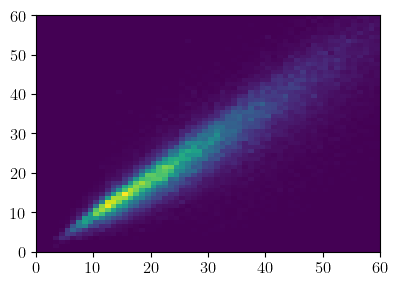

In [4]:
yaml_dict['nueCC_PC_energy_res']
yaml_dict['nueCC_FC_energy_res']

official_M_PC = []
official_M_FC = []
for i in range(len(yaml_dict['nueCC_PC_energy_res']['dependent_variables'][0]['values'])):
    official_M_PC.append(yaml_dict['nueCC_PC_energy_res']['dependent_variables'][0]['values'][i]["value"])
    official_M_FC.append(yaml_dict['nueCC_FC_energy_res']['dependent_variables'][0]['values'][i]["value"])

official_M_PC = np.reshape(official_M_PC, (60,60)).T # Check!
official_M_FC = np.reshape(official_M_FC, (60,60)).T # Check!

# plt.pcolormesh(official_M_PC)
plt.pcolormesh(official_M_FC)

# Calculating the chi2

In [5]:
all_pred_arr = np.concatenate([
                    pred_dic['nueCC_0pXpi_FC'], 
                    pred_dic['nueCC_0pXpi_PC'], 
                    pred_dic['nueCC_NpXpi_FC'], 
                    pred_dic['nueCC_NpXpi_PC'], 
                    pred_dic['numuCC_0pXpi_FC'], 
                    pred_dic['numuCC_0pXpi_PC'], 
                    pred_dic['numuCC_NpXpi_FC'], 
                    pred_dic['numuCC_NpXpi_PC'], 
                    pred_dic['numuCCpi0_FC'], 
                    pred_dic['numuCCpi0_PC'], 
                    pred_dic['NCpi0']])
all_data_arr = np.concatenate([
                    data_dic['nueCC_0pXpi_FC'], 
                    data_dic['nueCC_0pXpi_PC'], 
                    data_dic['nueCC_NpXpi_FC'], 
                    data_dic['nueCC_NpXpi_PC'], 
                    data_dic['numuCC_0pXpi_FC'], 
                    data_dic['numuCC_0pXpi_PC'], 
                    data_dic['numuCC_NpXpi_FC'], 
                    data_dic['numuCC_NpXpi_PC'], 
                    data_dic['numuCCpi0_FC'], 
                    data_dic['numuCCpi0_PC'], 
                    data_dic['NCpi0']])

bins = np.linspace(0, 2.5, 26)
bin_centers = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

cov = cov_dic['eleven_channel']

nueCC_FC_sigma = np.array([np.sqrt(cov[i, i]) for i in range(26)])

# adding diagonal Pearson covariance matrix for the data statistical uncertainty to the covariance matrix for the GoF test
nueCC_cov_with_stat = np.copy(cov)
for i in range(len(all_pred_arr)):
    nueCC_cov_with_stat[i, i] += all_pred_arr[i]  
chi2 = np.linalg.multi_dot(
    [np.transpose(all_data_arr - all_pred_arr),
     np.linalg.inv(nueCC_cov_with_stat), 
     all_data_arr - all_pred_arr])
print(chi2)

158.8036129067285


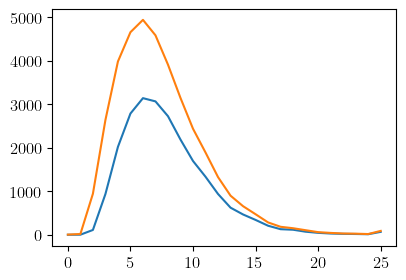

In [6]:
flavor = 'mu'
containment = 'FC'
plt.plot(pred_dic[f'nu{flavor}CC_NpXpi_{containment}'])
plt.plot(pred_dic[f'nu{flavor}CC_0pXpi_{containment}']+pred_dic[f'nu{flavor}CC_NpXpi_{containment}'])

(24, 13)


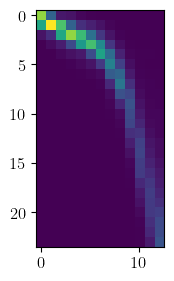

In [7]:
M = np.loadtxt(f"MicroTools/muB_data/unfolding_data/Migration_1eX.dat")
print(np.shape(M))
plt.imshow(M)

### Matrices from Nick Kamp

In [135]:
from scipy import interpolate
import MicroTools.InclusiveTools as inclusive

version = 'matrix_dumps_v4_Dec8'

# exclude the first 0 - 100 MeV bin and keept 0.1 -- 2.5 GeV
bin_edges_rec_muB = inclusive.inclusive.BinEdge[1:] 
bin_edges_rec_MB_11 = 1e-3*np.array([200,  300,  375,  475,  550,  675,  800,  950,  1100,  1250,  1500,  3000]) # MiniBooNE bin edges [MeV]
bin_edges_rec_MB_13 = 1e-3*np.array([200,  300,  375,  475,  550,  675,  800,  950,  1100,  1300,  1500,  1750, 2000, 2500]) # MiniBooNE bin edges [MeV]
bin_edges_true = 1e-3*np.array([200, 250, 300, 350, 400, 450, 500, 600, 800, 1000, 1500, 2000, 2500, 3000]) # Bin edges after unfolding [MeV]

bin_widths_rec_muB = np.diff(bin_edges_rec_muB)
bin_widths_rec_MB_11 = np.diff(bin_edges_rec_MB_11)
bin_widths_rec_MB_13 = np.diff(bin_edges_rec_MB_13)
bin_widths_true = np.diff(bin_edges_true)

bin_centers_rec_muB = (bin_edges_rec_muB[1:] + bin_edges_rec_muB[:-1])/2
bin_centers_rec_MB_11 = (bin_edges_rec_MB_11[1:] + bin_edges_rec_MB_11[:-1])/2
bin_centers_rec_MB_13 = (bin_edges_rec_MB_13[1:] + bin_edges_rec_MB_13[:-1])/2
bin_centers_true = (bin_edges_true[1:] + bin_edges_true[:-1])/2


std_M_MB = np.loadtxt('MicroTools/muB_data/unfolding_data/MiniBooNE_migration_matrix_paper_bins.dat')
std_M_muB = np.loadtxt(f"MicroTools/muB_data/unfolding_data/Migration_1eX.dat")
MB_Enu, MB_efficiency = np.load(f"MicroTools/antinus_data/{version}/MB_efficiency.npy")

Ar_Ereco_range = np.load(f"MicroTools/antinus_data/{version}/matrix_dumps/Ar40_Etrue_range.npy")
Ar_Etrue_range = np.load(f"MicroTools/antinus_data/{version}/matrix_dumps/Ar40_Etrue_range.npy")

CH2_Ereco_range = np.load(f"MicroTools/antinus_data/{version}/matrix_dumps/CH2_Etrue_range.npy")
CH2_Etrue_range = np.load(f"MicroTools/antinus_data/{version}/matrix_dumps/CH2_Etrue_range.npy")

# xx, yy = np.meshgrid(x, y)
# f_muB = interpolate.interp2d(Ar_Etrue_range, inclusive.inclusive.BinEdge[1:], antinu_M_muB, kind='linear', fill_value=1.0e-9)
# f_MB = interpolate.interp2d(x, y, Mfull_MB, kind='linear')
f_MB_eff = interpolate.interp1d(MB_Enu, MB_efficiency, bounds_error=False, fill_value=0.0)
# f_MB_eff = interpolate.interp1d(bin_centers_true, np.sum(std_M_MB, axis=0), bounds_error=False, fill_value=0.0)

antinu_M_muB = np.array(np.load(f"MicroTools/antinus_data/{version}/matrix_dumps/Ar40_f0.15.npy"))
antinu_M_muB = antinu_M_muB[1:-1,:]

antinu_M_MB = np.array(np.load(f"MicroTools/antinus_data/{version}/matrix_dumps/CH2_f0.17_TechNoteTrueBins.npy"))
antinu_M_MB = np.multiply(antinu_M_MB, f_MB_eff(bin_centers_true))
# antinu_M_MB[-1,-1] = 0.1
# antinu_M_MB *= 0.15

print(np.shape(std_M_MB), np.shape(std_M_muB), np.shape(antinu_M_MB), np.shape(antinu_M_muB))


(11, 13) (24, 13) (13, 13) (25, 50)


In [136]:
# BinBound = 1e-3*np.array([200.0,  300.0,  375.0,  475.0,  550.0,  675.0,  800.0,  950.0,  1100.0,  1250.0,  1500.0,  3000.0])
# antinu_M_MB = f_MB(bin_centers_true, bin_centers_rec_MB)
aux_true_bins = np.linspace(bin_centers_true[0], bin_centers_true[-1], 65, endpoint=True)
# antinu_M_muB = f_muB(aux_true_bins, bin_centers_rec_muB)
antinu_M_muB = f_muB(bin_centers_true, bin_centers_rec_muB)

print(np.sum(antinu_M_MB, axis=0))
print(np.sum(antinu_M_muB, axis=0))

[0.06026106 0.08888388 0.10099042 0.10508304 0.10524461 0.10452227
 0.10633652 0.11194693 0.10822283 0.09549576 0.07369262 0.
 0.        ]
[5.22778969e-01 7.21456822e-01 8.69707360e-01 9.35515373e-01
 9.67812317e-01 9.83385229e-01 9.92879063e-01 9.97508091e-01
 9.98713129e-01 9.99194307e-01 9.99185071e-01 2.40000000e-08
 2.40000000e-08]


In [137]:
np.savetxt("MicroTools/muB_data/unfolding_data/our_antinu_MiniBooNE_migration_matrix.dat", antinu_M_MB)
Mtest = np.loadtxt("MicroTools/muB_data/unfolding_data/our_antinu_MiniBooNE_migration_matrix.dat")

assert np.isclose(Mtest, antinu_M_MB).sum()

In [138]:
np.savetxt("MicroTools/muB_data/unfolding_data/our_antinu_Migration_1eX.dat", antinu_M_muB)
Mtest = np.loadtxt("MicroTools/muB_data/unfolding_data/our_antinu_Migration_1eX.dat")

assert np.isclose(Mtest, antinu_M_muB).sum()

In [139]:
fig2_data = np.loadtxt('MicroTools/muB_data/unfolding_data/data_nue_subtracted.dat')
fig2_bkg = np.loadtxt('MicroTools/muB_data/unfolding_data/nue_intrinsic.dat')


In [162]:
print(np.sum(std_M_MB, axis=0))
print(np.sum(antinu_M_MB, axis=0))

[0.02870032 0.08182898 0.11495385 0.11724245 0.08923715 0.09954418
 0.1033415  0.07003015 0.06002825 0.03839708 0.02554719 0.01364663
 0.00462801]
[0.06026106 0.08888388 0.10099042 0.10508304 0.10524461 0.10452227
 0.10633652 0.11194693 0.10822283 0.09549576 0.07369262 0.
 0.        ]


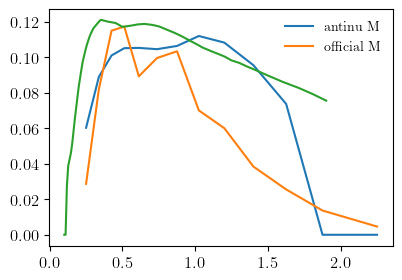

In [140]:
plt.plot(bin_centers_rec_MB_13, np.sum(antinu_M_MB, axis=0), label='antinu M')
# plt.plot(bin_centers_rec_MB_13, np.sum(antinu_M_muB, axis=0))
plt.plot(bin_centers_rec_MB_13, np.sum(std_M_MB, axis=0), label='official M')
plt.plot(MB_Enu, MB_efficiency)

plt.legend()

In [141]:
r = std_M_MB/antinu_M_MB[:-2,:]
r[r > 100] = None

/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_23805/2979952124.py:1: RuntimeWarning: divide by zero encountered in divide
  r = std_M_MB/antinu_M_MB[:-2,:]
/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_23805/2979952124.py:1: RuntimeWarning: invalid value encountered in divide
  r = std_M_MB/antinu_M_MB[:-2,:]


/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_23805/758692499.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(bin_centers_true, bin_centers_rec_MB_13, 1/(-np.log10(test_antinu_M)))


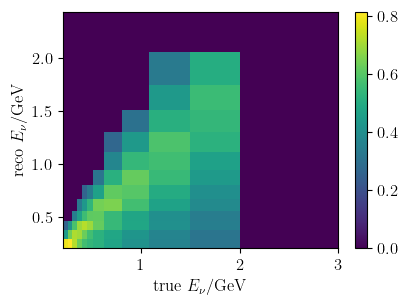

/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_23805/758692499.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(bin_edges_true, bin_edges_rec_MB_11, 1/(-np.log10(std_M_MB)))


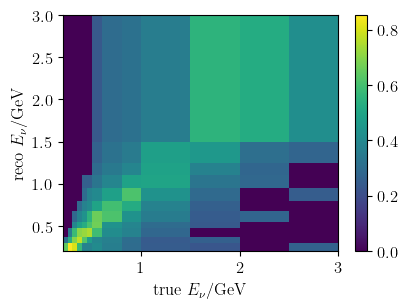

In [142]:
test_antinu_M = np.where(antinu_M_MB < 1e-4, 0, antinu_M_MB )

plt.pcolormesh(bin_centers_true, bin_centers_rec_MB_13, 1/(-np.log10(test_antinu_M)))

plt.xlabel(r"true $E_\nu$/GeV")
plt.ylabel(r"reco $E_\nu$/GeV")
# plt.xlim(0,1.5)
# plt.ylim(0,1.5)
plt.colorbar()

plt.show()


plt.pcolormesh(bin_edges_true, bin_edges_rec_MB_11, 1/(-np.log10(std_M_MB)))

plt.xlabel(r"true $E_\nu$/GeV")
plt.ylabel(r"reco $E_\nu$/GeV")
# plt.xlim(0,1.5)
# plt.ylim(0,1.5)
plt.colorbar()

plt.show()
# plt.pcolormesh(bin_edges_true, bin_edges_rec_MB_11, r)
# plt.pcolormesh(bin_centers_true, bin_centers_rec_muB, antinu_M_muB)


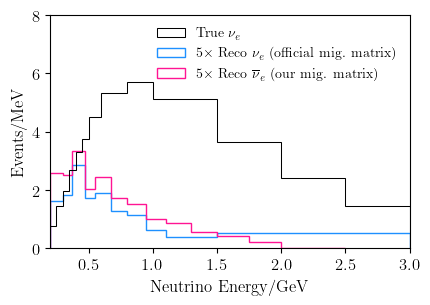

In [145]:
MC_truth = np.loadtxt("MicroTools/muB_data/unfolding_data/MC_truth.dat")
std_MB_eff = np.sum(std_M_MB, axis=0)

this_MB_bins = bin_centers_true

fig, ax = std_fig()

# (n, b, _)=ax.hist(bin_centers_true, weights=MC_truth, bins=bin_edges_true, histtype='step', edgecolor='blue', hatch='', lw=0.1, label=r'True $\nu_e$')
(n, b, _)=ax.hist(bin_centers_true, weights=MC_truth, bins=bin_edges_true, histtype='step', edgecolor='black', lw=0.75, label=r'True $\nu_e$',zorder=3)
# _=ax.hist(bin_centers_rec_MB_11, weights=5*np.matmul(std_M_MB, MC_truth), bins=bin_edges_rec_MB_11, histtype='stepfilled', facecolor='limegreen', lw=0, label=r'Reco $\nu_e$',zorder= 2)
_=ax.hist(bin_centers_rec_MB_11, weights=5*np.matmul(std_M_MB, MC_truth), bins=bin_edges_rec_MB_11, histtype='step', edgecolor='dodgerblue', lw=1., label=r'$5\times$ Reco $\nu_e$ (official mig. matrix)')
_=ax.hist(bin_centers_rec_MB_13, weights=5*np.matmul(antinu_M_MB, MC_truth), bins=bin_edges_rec_MB_13, histtype='step', color='deeppink', lw=1., label=r'$5\times$ Reco $\overline{\nu}_e$ (our mig. matrix)')

ax.set_ylabel('Events/MeV')
ax.set_xlabel('Neutrino Energy/GeV')

ax.legend()

ax.set_ylim(0,8)
ax.set_xlim(0.2,3)

fig.savefig("Plots/test_reco.pdf")

(array([3.61002334, 2.88002856, 2.39436776, 1.70023943, 1.43228275,
        1.07121453, 0.92680259, 0.75631319, 0.54136346, 0.39441568,
        0.0919688 ]),
 array([0.2  , 0.3  , 0.375, 0.475, 0.55 , 0.675, 0.8  , 0.95 , 1.1  ,
        1.25 , 1.5  , 3.   ]),
 [<matplotlib.patches.Polygon at 0x7fe9f9bed130>])

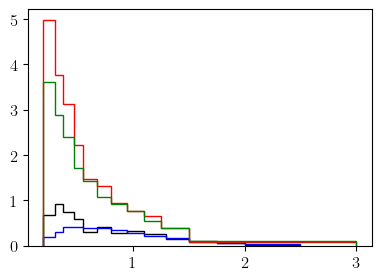

In [146]:

plt.hist(bin_centers_rec_MB_13, weights=fig2_data, bins=bin_edges_rec_MB_13, histtype='step', edgecolor='black', label=r'True $\nu_e$')
plt.hist(bin_centers_rec_MB_13, weights=fig2_bkg, bins=bin_edges_rec_MB_13, histtype='step', edgecolor='blue', label=r'True $\nu_e$')

plt.hist(mbfit.bin_centers*1e-3, weights=mbfit.mb_nue_analysis_data/mbfit.bin_width, bins=mbfit.bin_edges*1e-3, histtype='step', edgecolor='red', label=r'True $\nu_e$')
plt.hist(mbfit.bin_centers*1e-3, weights=mbfit.mb_nue_analysis_predicted_background/mbfit.bin_width, bins=mbfit.bin_edges*1e-3, histtype='step', edgecolor='green', label=r'True $\nu_e$')


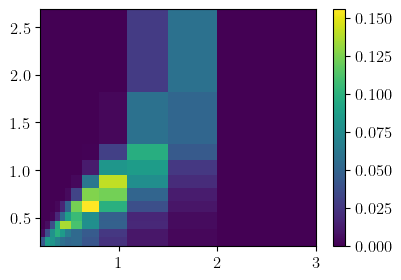

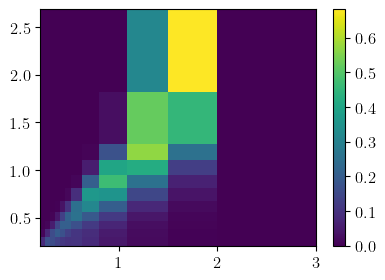

In [149]:
A_times_u = np.multiply(antinu_M_MB[:-2,:], MC_truth)
M = np.multiply(A_times_u.T, 1/np.sum(A_times_u, axis=1)).T
plt.pcolormesh(bin_centers_true, bin_centers_rec_MB_11, A_times_u)
plt.colorbar()
plt.show()

plt.pcolormesh(bin_centers_true, bin_centers_rec_MB_11, M)
plt.colorbar()
plt.show()

In [150]:
np.sum(np.matmul(std_M_MB, our_unfolded_nominal_nubar))


661.77419345

In [163]:
# Test unfolding
my_unfolder = unfolder.MBtomuB(analysis='1eX', remove_high_energy=False, unfold=True, nubar_fraction=1.0)

# Some useful MiniBooNE templates
# mb_nominal_template = mbfit.mb_nue_analysis_data -  mbfit.mb_nue_analysis_predicted_background
mb_nominal_template = mbfit.mb_nue_analysis_predicted_background

our_unfolded_intrinsic_nu = my_unfolder.unfold(fig2_bkg[:-2]*mbfit.bin_width, nubar=False)
our_unfolded_nominal_nu = my_unfolder.unfold(fig2_data[:-2]*mbfit.bin_width, nubar=False)
our_unfolded_nominal_nubar = my_unfolder.unfold(fig2_data[:-2]*mbfit.bin_width, nubar=True, n_iter=3)
# our_unfolded_nominal_nubar = my_unfolder.unfold(fig2_data*bin_widths_rec_MB_13, nubar=True, n_iter=5)
# our_unfolded_nominal_nubar = my_unfolder.unfold(np.matmul(antinu_M_MB, MC_truth), nubar=True)
# our_unfolded_nominal = my_unfolder.miniToMicro(mb_nominal_template)

NameError: name 'u' is not defined

10 11 10


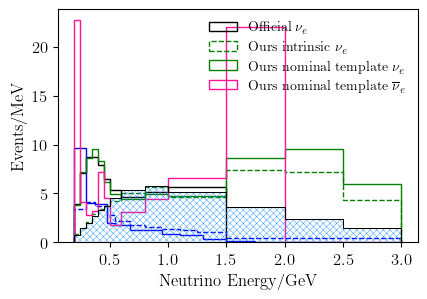

In [172]:
bin_e = bin_edges_true[:-3]
bin_c = bin_centers_true[:-3]
bin_w = bin_widths_true[:-3]

_, intrinsic_nue = np.loadtxt("MicroTools/muB_data/unfolding_data/unfolded_MC_truth.dat", unpack=True)
unfolded_nominal = np.loadtxt("MicroTools/muB_data/unfolding_data/unfolded_nominal_template.dat")
std_MB_eff = np.sum(std_M_MB, axis=0)

fig, ax = std_fig()

print(len(intrinsic_nue), len(bin_e), len(bin_c))

# (n, b, _) = ax.hist(bin_c, weights = intrinsic_nue, bins = bin_e, histtype='step', facecolor='None', edgecolor='dodgerblue', hatch='xxxxx', lw=0, label=r'True $\nu_e$')
# (n, b, _) = ax.hist(bin_c, weights = intrinsic_nue, bins = bin_e, histtype='step', edgecolor='black')
(n, b, _) = ax.hist(bin_c, weights = unfolded_nominal, bins = bin_e, histtype='step', edgecolor='black', label=r'Official $\nu_e$')

_=ax.hist(bin_centers_rec_MB_13, weights=5*np.matmul(antinu_M_MB[:,:-3], our_unfolded_nominal_nubar[:-3]/bin_w/1e3), bins=bin_edges_rec_MB_13, histtype='step', color='blue', lw=1.)
_=ax.hist(bin_centers_rec_MB_11, weights=5*np.matmul(std_M_MB, our_unfolded_nominal_nu)/bin_widths_rec_MB_11/1e3, bins=bin_edges_rec_MB_11, histtype='step', color='blue', lw=1., ls = '--')


bin_e = bin_edges_true
bin_c = bin_centers_true
bin_w = bin_widths_true

(n, b, _) = ax.hist(bin_c, weights=our_unfolded_intrinsic_nu/bin_w/1e3, bins=bin_e, histtype='step', edgecolor='green', ls='--', label=r'Ours intrinsic $\nu_e$')
(n, b, _) = ax.hist(bin_c, weights=our_unfolded_nominal_nu/bin_w/1e3, bins=bin_e, histtype='step', edgecolor='green', ls='-', label=r'Ours nominal template $\nu_e$')
(n, b, _) = ax.hist(bin_c, weights=our_unfolded_nominal_nubar/bin_w/1e3, bins=bin_e, histtype='step', edgecolor='deeppink', ls='-', label=r'Ours nominal template $\overline{\nu}_e$')

(n, b, _)=ax.hist(bin_centers_true, weights=MC_truth, bins=bin_edges_true, histtype='step', edgecolor='black', lw=0.75, zorder=3)
(n, b, _) = ax.hist(bin_centers_true, weights = MC_truth, bins = bin_edges_true, histtype='step', facecolor='None', edgecolor='dodgerblue', hatch='xxxxx', lw=0)

# plt.plot(bin_centers_true, 50*np.sum(antinu_M_MB, axis = 0), c = 'black', lw=2)

ax.set_ylabel('Events/MeV')
ax.set_xlabel('Neutrino Energy/GeV')
ax.legend()
# ax.set_ylim(0,20)
# ax.set_xlim(0.2,1.5)

fig.savefig("Plots/Test_unfolding_antinue.pdf")

In [188]:
# Chekc that the sum of the templates is still okay

print(np.sum(MC_truth*bin_widths_true*1e3))
print(np.sum(intrinsic_nue*bin_w[:-3]*1e3))
print(np.sum(our_unfolded_intrinsic_nu))
print(np.sum(our_unfolded_nominal_nu))

9687.9
5936.9565208
15018.564479432842
19003.445191163617


NameError: name 'u' is not defined

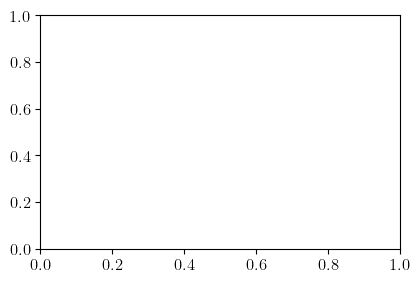

In [173]:
from matplotlib.pyplot import cm
fig, ax = std_fig()

iters = range(2,20,2)
color = cm.viridis(np.linspace(0, 1, len(iters)))

for i, c in zip(iters[::-1], color):
    our_unfolded_nominal_nubar = my_unfolder.unfold(fig2_data[:-2]*mbfit.bin_width, nubar=True, n_iter=i)
    (n, b, _) = ax.hist(bin_c, weights=our_unfolded_nominal_nubar[:-3]/bin_w/1e3, lw=0.75, bins=bin_e, histtype='step', edgecolor=c, ls='-', label=rf'iters = {i}')

ax.legend(ncol=2)

# ax.set_ylim(0,50)


array([0.00000000e+00, 3.70703593e+00, 9.99873089e+00, 8.97393856e+00,
       6.09817615e+00, 4.09828745e+00, 2.55760150e+00, 1.33886685e+00,
       5.07740299e-01, 1.55243311e-01, 7.01578542e-02, 3.23583492e-02,
       2.54323927e-02, 6.31835041e-03, 3.95957080e-03, 3.44288913e-03,
       4.16592022e-03, 0.00000000e+00, 1.44642576e-03, 0.00000000e+00,
       3.74900019e-03, 0.00000000e+00, 1.06192480e-03, 0.00000000e+00,
       0.00000000e+00])